In [1]:
import MLmethods
import GenerateData
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
WEIGHTS = np.array([-0.4, 0.6])
LIMITS = (-5, 5)
NUM_SAMPLES=100
SIGMA = 1
X, y = GenerateData.generate_noisy_linear(NUM_SAMPLES, WEIGHTS, SIGMA, LIMITS)

# Augment X with x_0 = 1
x_0 = np.ones((X.shape[0], 1))
X1 = np.concatenate((x_0, X), axis=1)

# Find the estimated weights using Linear Regression
w = MLmethods.LinearRegression(X1, y)

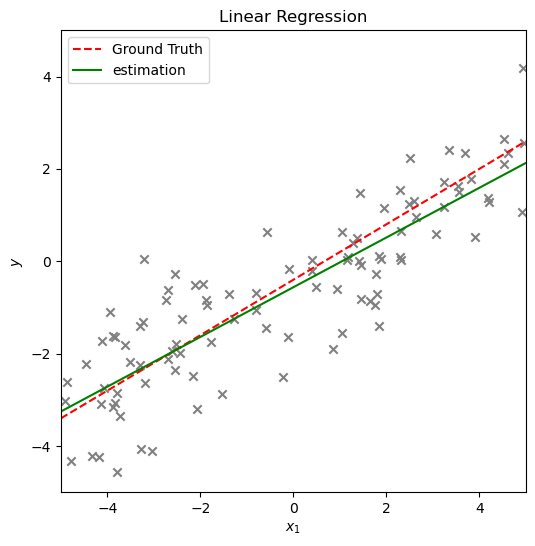

In [3]:
def plot_LinearRegression_1d( axes, X1, y, weights, weights_estimated, limits):
    """
    Plot the results of linear regression.

    # Arguments
        axes: a Matplotlib Axes object into which to plot
        X1: an array of sample data, where rows are samplesand the single column is the input feature.
            exceot the first column is equal to one, our dummy variable.
        y: vector of output values corresponding to the rows of X 
        weights: a weight vector of length 2, specifying the true generating model, with a bias term at index 0.
        weights_estimated: a weight vecotor of length 2, specifying the estimated hyperplane, with a bias term ar index 0.
        limits: a tuple (low, high) specifying the value range of the feature dimension x1
    """
    # plot the data
    axes.scatter(X1[:,1], y, marker='x', color='grey')

    # plot the true relationship
    y0 = weights[0] + limits[0] * weights[1]
    y1 = weights[0] + limits[1] * weights[1]

    axes.plot(limits, (y0, y1), linestyle='dashed', color='red', label='Ground Truth')

    # Plot the estimated relationship
    y0 = weights_estimated[0] + limits[0] * weights_estimated[1]
    y1 = weights_estimated[0] + limits[1] * weights_estimated[1]

    axes.plot(limits, (y0, y1), linestyle='solid', color='green', label='estimation' )

    axes.set_xlim(limits[0], limits[1])
    axes.set_ylim(limits[0], limits[1])
    axes.set_xlabel('$x_1$')
    axes.set_ylabel('$y$')

    axes.legend(loc='upper left')
    axs.set_title('Linear Regression')


fig = plt.figure(figsize=(6, 6))
axs = fig.subplots()

plot_LinearRegression_1d(axs, X1, y, WEIGHTS,w, LIMITS)

In [4]:
# Differen learning rates:
l2s = np.arange(5) * 25

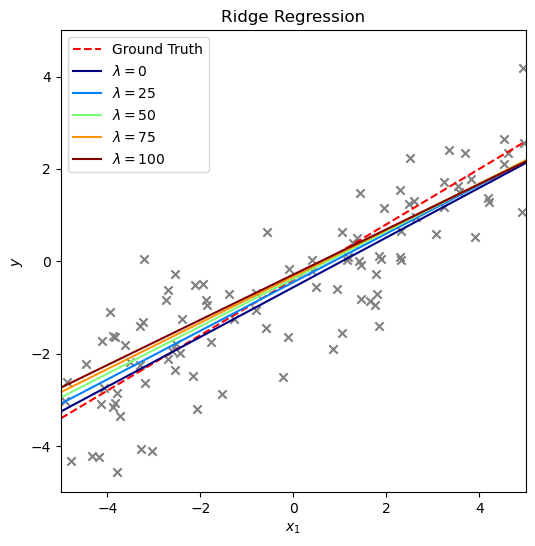

In [5]:
def plot_ridge_regression_1d ( axes, X1, y, weights, limits, l2s=[0] ):
    """
    Perform ridge regression.

    # Arguments
        axes: an axes object
        X1: an array of sample data, including x0=1 terms
        y: vector of output values
        weights: a weight vector 
        limits: a tuple (low, high) specifying the value range of the feature dimension x1
        l2s: a list (or vector/array) of numeric values specifying amounts of L2 regularisation to use.
    """
    # plot the data
    axes.scatter(X1[:,1], y, marker='x', color='grey')

    # plot the true relationship
    y0 = weights[0] + limits[0] * weights[1]
    y1 = weights[0] + limits[1] * weights[1]

    axes.plot(limits, (y0, y1), linestyle='dashed', color='red', label='Ground Truth')

    cmap = matplotlib.colormaps['jet']
    for l2 in l2s:
        w = MLmethods.RidgeRegression(X1, y, l2)
        
        # Plot the estimated relationship
        y0 = w[0] + limits[0] * w[1]
        y1 = w[0] + limits[1] * w[1]

        axes.plot(limits, (y0, y1), linestyle='solid', color=cmap(l2/np.max(l2s)), label='$\lambda=%.f$' % l2)

    axes.set_xlim(limits[0], limits[1])
    axes.set_ylim(limits[0], limits[1])
    axes.set_xlabel('$x_1$')
    axes.set_ylabel('$y$')

    axes.legend(loc='upper left')

    axes.set_title('Ridge Regression')

fig = plt.figure(figsize=(6, 6))
axs = fig.subplots()

plot_ridge_regression_1d(axs, X1, y, WEIGHTS, LIMITS, l2s)

l1:0
l1:15
l1:30
l1:45
l1:60


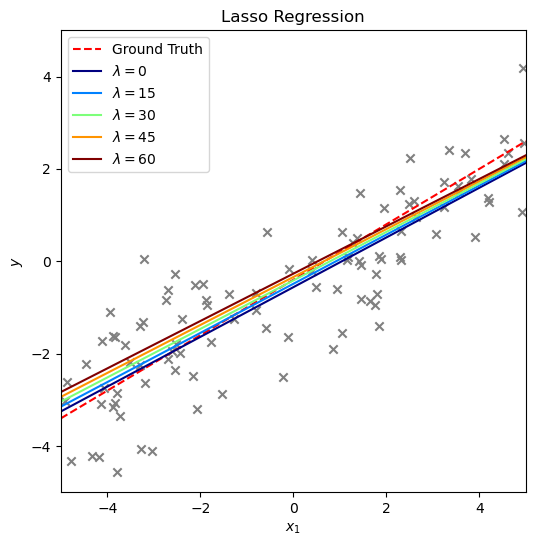

In [6]:
def plot_lasso_regression_1d ( axes, X1, y, weights, limits, l1s=[0] ):
    """
    Perform Lasso Regression.

    # Arguments
        axes: an axes object
        X1: an array of sample data
            rows of X
        weights: a weight vector 
        limits: a tuple (low, high) specifying the value range of the feature dimension x1
        l1s: a list (or vector/array) of numeric values specifying amounts of L1 regularisation to use.
    """
    # plot the data
    axes.scatter(X1[:,1], y, marker='x', color='grey')

    # plot the true relationship
    y0 = weights[0] + limits[0] * weights[1]
    y1 = weights[0] + limits[1] * weights[1]

    axes.plot(limits, (y0, y1), linestyle='dashed', color='red', label='Ground Truth')

    cmap = matplotlib.colormaps['jet']
    for l1 in l1s:
        print(f'l1:{l1}')
        ww, losses = MLmethods.LassoRegression_with_BatchGD(X1, y, l1, lr=0.001)

        
        # Plot the estimated relationship
        y0 = ww[-1][0] + limits[0] * ww[-1][1]
        y1 = ww[-1][0] + limits[1] * ww[-1][1]

        axes.plot(limits, (y0, y1), linestyle='solid', color=cmap(l1/np.max(l1s)), label='$\lambda=%.f$' % l1)

    axes.set_xlim(limits[0], limits[1])
    axes.set_ylim(limits[0], limits[1])
    axes.set_xlabel('$x_1$')
    axes.set_ylabel('$y$')

    axes.legend(loc='upper left')

    axes.set_title('Lasso Regression')

fig = plt.figure(figsize=(6, 6))
axs = fig.subplots()

l1s = np.arange(5) * 15
plot_lasso_regression_1d(axs, X1, y, WEIGHTS, LIMITS, l1s)


In [7]:
# Generate data for a 1D polimonial model:
WEIGHTS_ploy = [0.5, -0.4, 0.6] # If the number of weights here is still 2, we're still using linear model
SIGMA = 3
X_poly, y_ploy = GenerateData.generate_noisy_poly_1d(NUM_SAMPLES, WEIGHTS_ploy, SIGMA, LIMITS)

true weights: [0.5, -0.4, 0.6]
fit 1 weights: [ 6.11041831 -0.38583206]
fit 2 weights: [ 0.39749704 -0.48688956  0.62517622]
fit 3 weights: [ 0.39018602 -0.3480827   0.62644933 -0.00846068]
fit 4 weights: [-0.03699481 -0.36752853  0.79975369 -0.00698173 -0.00771511]


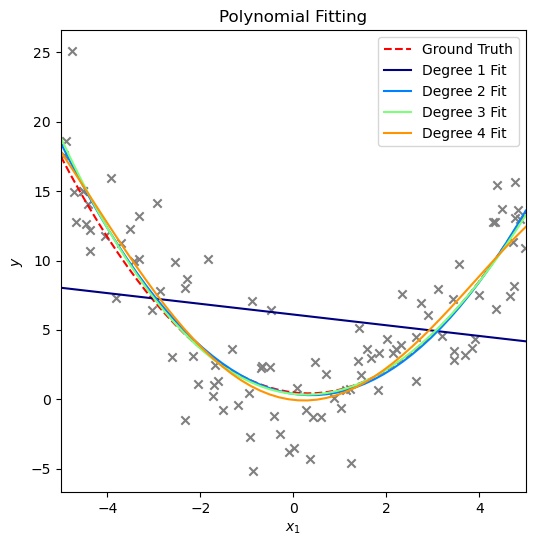

In [8]:
def plot_poly_fit_1d ( axes, X, y, weights, limits, degrees, l2=0):
    """
    Fit polynomials of different degrees to the supplied data, and plot the results.

    # Arguments
        axes: a axes object 
        X: an array of sample data
        y: vector of output values
        weights: the true polynomial coefficients
        limits: a tuple (low, high) specifying the value range of the feature dimension x1
        degrees: a list of polynomial degree values
        l2: the amount of l2 regularisation to apply

    # Returns
        None
    """
    axes.scatter(X, y, color='grey', marker='x')

    print(f'true weights: {weights}')
    
    # Define the ground truth x
    ground_x = np.array([np.linspace(limits[0], limits[1], 50)]).reshape((-1,1))
    
    # Find the polynomial projection of the ground truth x
    x_ploy = GenerateData.monomial_projection_1d(ground_x, len(weights)-1) # We set the degree arguement to be len(weights) - 1 is due to 
    
    # Calculate the grouns truth y 
    ground_y = x_ploy @ weights
    
    # Plot the ground truth graph
    axes.plot(ground_x, ground_y, color='red', linestyle='dashed', label='Ground Truth')

    cmap = matplotlib.colormaps['jet']
    
    # Loop through possible degrees
    n = 0
    for deg in degrees:
        # Find the projection of our sample data
        X_m = GenerateData.monomial_projection_1d(X, deg)
        
        # Find the optimised weights using RidgeRegression
        w = MLmethods.RidgeRegression(X_m, y, l2)
        print(f'fit {deg} weights: {w}')
        x_ploy_ = GenerateData.monomial_projection_1d(ground_x, deg)
        fit_y = x_ploy_ @ w.reshape((len(w),1))
        axes.plot(ground_x, fit_y, linestyle='solid', color=cmap(n/len(degrees)), label=f'Degree {deg} Fit')
        n += 1

    axes.set_xlim(limits[0], limits[1])
    axes.set_xlabel('$x_1$')
    axes.set_ylabel('$y$')

    axes.legend(loc='upper right')

    axes.set_title('Polynomial Fitting')

NUM_SAMPLES = 50
SIGMA = 3

fig = plt.figure(figsize=(6, 6))
ax = fig.subplots()

plot_poly_fit_1d( ax, X_poly, y_ploy, WEIGHTS_ploy, LIMITS, [1, 2, 3, 4])

In [9]:
def plot_logistic_regression_2d(axs, X, y, weights, limits):
    """
    Fit a 2D logistic regression classifier and plot the results.

    # Arguments
        axs: an array of 2 axes objects 
        X: an array of sample data
        y: vector of binary class labels 
        weights: weights defining the true decision boundary
        limits: a tuple (low, high) specifying the value range of both feature dimensions

    # Returns
        None
    """
    ww, ll = MLmethods.logistic_regression_with_batch_GD(X, y)
    
    if w is None:
        axs[0].set_title("Logistic Regression Gradient Descent")
        axs[1].set_title("Logistic Regression Results")
        return
    
    print('Number of iterations: %i' % len(ll))
    axs[0].plot(ll)
    axs[0].set_title('Logistic Regression with Batch Gradient Descent')
    axs[0].set_xlabel('Iteration')
    axs[0].set_ylabel('Logistic Loss')
    
    x1_mesh, x2_mesh = np.mgrid[limits[0]:limits[1]:0.1, limits[0]:limits[1]:0.1]
    x_domain = np.stack([x1_mesh.flatten(), x2_mesh.flatten()])
    x_domain = np.concatenate((np.ones((1, x_domain.shape[1])), x_domain), axis=0)
    prob = 1 / (1 + np.exp(-ww[-1] @ x_domain)).reshape(x1_mesh.shape)
    axs[1].imshow(prob.T, origin='lower', extent=(limits[0], limits[1], limits[0], limits[1]), cmap='Blues')
    
    # True decision boundry
    y0 = -(weights[0] + limits[0] * weights[1]) / weights[2]
    y1 = -(weights[0] + limits[1] * weights[1]) / weights[2]
    
    axs[1].plot(limits, (y0, y1), linestyle='dashed', color='red', marker='')

    axs[1].plot(X[y==0,1], X[y==0,2], linestyle='', color='orange', marker='v', label='Class 0')
    axs[1].plot(X[y==1,1], X[y==1,2], linestyle='', color='darkorchid', marker='o', label='Class 1')

    axs[1].set_xlabel('$x_1$')
    axs[1].set_ylabel('$x_2$')

    axs[1].legend(loc='upper left', framealpha=1)

    axs[1].set_title('Logistic Regression Results')

Number of iterations: 166


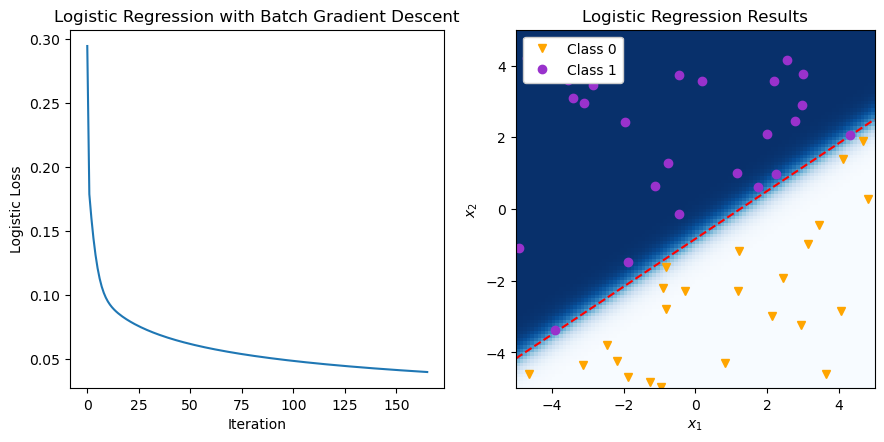

In [10]:
fig = plt.figure(figsize=(9, 4.5))
axs = fig.subplots(ncols=2)

X, y = GenerateData.generate_linearly_separable(NUM_SAMPLES, WEIGHTS_ploy, LIMITS)
# Augment X with x0=1 terms
X0 = np.concatenate((np.ones((X.shape[0],1)), X),axis=1)
plot_logistic_regression_2d(axs, X0, y, WEIGHTS_ploy, LIMITS)

fig.tight_layout(pad=1)

In [11]:
def plot_logistic_regression_2d(axs, X, y, weights, limits):
    """
    Fit a 2D logistic regression classifier and plot the results.

    # Arguments
        axs: an array of 2 axes objects 
        X: an array of sample data
        y: vector of binary class labels 
        weights: weights defining the true decision boundary
        limits: a tuple (low, high) specifying the value range of both feature dimensions

    # Returns
        None
    """
    ww, ll = MLmethods.logistic_regression_with_stochastic_GD(X, y)
    
    if w is None:
        axs[0].set_title("Logistic Regression Gradient Descent")
        axs[1].set_title("Logistic Regression Results")
        return
    
    print('Number of iterations: %i' % len(ll))
    axs[0].plot(ll)
    axs[0].set_title('Logistic Regression with Stochastic Gradient Descent')
    axs[0].set_xlabel('Iteration')
    axs[0].set_ylabel('Logistic Loss')
    
    x1_mesh, x2_mesh = np.mgrid[limits[0]:limits[1]:0.1, limits[0]:limits[1]:0.1]
    x_domain = np.stack([x1_mesh.flatten(), x2_mesh.flatten()])
    x_domain = np.concatenate((np.ones((1, x_domain.shape[1])), x_domain), axis=0)
    prob = 1 / (1 + np.exp(-ww[-1] @ x_domain)).reshape(x1_mesh.shape)
    axs[1].imshow(prob.T, origin='lower', extent=(limits[0], limits[1], limits[0], limits[1]), cmap='Blues')
    
    # True decision boundry
    y0 = -(weights[0] + limits[0] * weights[1]) / weights[2]
    y1 = -(weights[0] + limits[1] * weights[1]) / weights[2]
    
    axs[1].plot(limits, (y0, y1), linestyle='dashed', color='red', marker='')

    axs[1].plot(X[y==0,1], X[y==0,2], linestyle='', color='orange', marker='v', label='Class 0')
    axs[1].plot(X[y==1,1], X[y==1,2], linestyle='', color='darkorchid', marker='o', label='Class 1')

    axs[1].set_xlabel('$x_1$')
    axs[1].set_ylabel('$x_2$')

    axs[1].legend(loc='upper left', framealpha=1)

    axs[1].set_title('Logistic Regression Results')

Number of iterations: 52


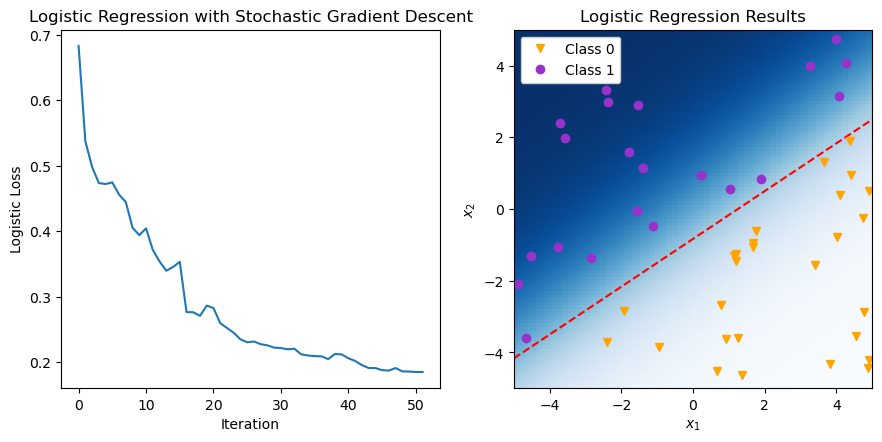

In [12]:
fig = plt.figure(figsize=(9, 4.5))
axs = fig.subplots(ncols=2)

X, y = GenerateData.generate_linearly_separable(NUM_SAMPLES, WEIGHTS_ploy, LIMITS)
# Augment X with x0=1 terms
X0 = np.concatenate((np.ones((X.shape[0],1)), X),axis=1)
plot_logistic_regression_2d(axs, X0, y, WEIGHTS_ploy, LIMITS)

fig.tight_layout(pad=1)

We can see that when the batch size is small like batch_size=1, the logistic regression with stochastic gradient descent makes less accurate predictions than the logistic regression with batch gradient descent. Small batch size results in higher variance in the gradient estimates, causing the model to make noisy updates to the parameters.